# Проект: Исследование стартапов

- Автор: Дудаков Т.С.
- Дата: 20.09.2025

## Введение

### Цели и задачи проекта

**Основной целью** проекта является проведение комплексного анализа исторических данных о стартапах для формирования обоснованной и надежной основы будущей инвестиционной стратегии компании. Проект нацелен на переход от предоставления льготных займов к полноценной инвестиционной деятельности, подразумевающей покупку, развитие и последующую продажу перспективных компаний. Ключевой ожидаемый результат — создание проверенного и интерпретированного датасета, а также получение ответов на конкретные бизнес-вопросы, которые позволят компании выработать эффективную модель ведения нового для себя бизнеса.

Для этого необходимо решить следующие ключевые задачи:
1. Подготовить и очистить данные: провести аудит качества, предобработку и объединить таблицы по корректным столбцам.
2. Оценить достоверность данных: проверить правдоподобность информации о сотрудниках и их образовании.
3. Проанализировать аномалии: изучить суть сделок с символической стоимостью (0 или 1 доллар).
4. Провести аналитическое исследование: выявить зависимость цены покупки от категории стартапа и количества раундов финансирования, рассчитать и визуализировать ключевые показатели.
5. Выявить признаки успеха: определить показатели, которые с наибольшей вероятностью коррелируют с успешными сделками.

### Описание данных

Таблица ```acquisition```. Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

Таблица ```company_and_rounds```. Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

Таблица ```education```. Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

Таблица ```people```. Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

Таблица ```degrees```. Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

Также есть дополнительные таблицы. Эти таблицы не требуются для выполнения проекта, но связаны с исследуемыми данными:

Таблица ```fund```. Содержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

Таблица ```investment```. Содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — идентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

### Содержание проекта

План выполнения проекта формулируется следующим образом.

**Этап 1. Знакомство с данными и первичная предобработка**
На первом этапе проводится первичный аудит данных для понимания их структуры, качества и потенциала для дальнейшего анализа.

1.  **Загрузка и первичный осмотр:** Загружаются все предоставленные датасеты. Проверяются и приводятся названия всех столбцов к единому формату. Для каждого набора данных изучается общая информация: количество записей, типы данных и количество пропущенных значений для формирования первоначального понимания полноты данных.
2.  **Приведение типов данных и оценка пропусков:** Преобразуются столбцы с датами в соответствующий тип данных `datetime` для последующего временного анализа. На основе полученной информации о пропусках формулируется предварительный вывод о том, достаточно ли данных для решения поставленных задач, и обозначаются основные проблемные зоны.

**Этап 2. Предобработка данных и предварительное исследование**
На этом этапе проводится углубленный анализ отдельных бизнес-вопросов и начинается подготовка данных к объединению.

1.  **Анализ раундов финансирования по годам:** На основе датасета `company_and_rounds.csv` строится сводная таблица, показывающая типичный размер инвестиций в раунде и общее количество раундов для каждого года (с фильтром для лет, где было более 50 раундов). Результаты визуализируются на графике для отображения динамики и формулировки ответов на вопросы о пиковом годе и тенденциях 2013 года.
2.  **Оценка полноты данных об образовании:** Объединяются таблицы `people.csv` и `education.csv` для оценки полноты сведений об образовании сотрудников. Компании разделяются на логичные группы по размеру (например, малые, средние, крупные) для вычисления средней доли сотрудников без информации об образовании в каждой группе. Дополнительно проверяется возможность и целесообразность присоединения таблицы `degrees.csv` для обогащения анализа.
3.  **Проверка столбцов для объединения:** Детально анализируется столбец `network_username`, который встречается в нескольких таблицах. Проверяется, является ли он уникальным идентификатором и насколько часто значения в этом столбце дублируются среди разных датасетов для определения возможности его использования для надежного объединения данных.
4.  **Глубокая предобработка проблемного датасета:** Проводится работа с датасетом `company_and_rounds.csv`. Он приводится в структурированный вид, удобный для анализа на уровне компаний. Работа включает обработку пропусков, преобразование структуры таблицы и обеспечение целостности данных для корректного соотнесения каждого параметра с конкретной компанией.

После завершения этого этапа результаты предоставляются на ревью для подтверждения корректности выбранного направления перед переходом к углубленному анализу.

**Этап 3. Исследовательский анализ объединённых таблиц**
После подтверждения корректности выполненных работ проводится ключевая часть анализа на основе объединенных данных.

1.  **Формирование итоговой таблицы для анализа:** Объединяются обработанные данные на основе подготовленного `company_and_rounds.csv`. Для анализа отбираются компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. Проверяется полнота и корректность получившейся таблицы.
2.  **Анализ выбросов:** Графическими и аналитическими методами исследуется столбец `funding_total` для определения типичного размера общего финансирования для одной компании и выявления выбивающихся значений. Анализируются показатели, возвращаемые методом `.describe()`, и оценивается применимость стандартных методов для нахождения типичных значений.
3.  **Исследование аномальных сделок:** Выявляются и анализируются компании, которые были проданы за ноль или за один доллар, но при этом имели ненулевой общий объём финансирования. Для столбца `funding_total` рассчитываются верхняя и нижняя границы выбросов с указанием соответствующих процентилей.
4.  **Анализ цен по категориям:** Среди категорий стартапов выделяются те, которые характеризуются типично высокими ценами покупки и наибольшим разбросом цен. Обосновывается методология составления топа и выбора градаций.
5.  **Анализ количества раундов финансирования:** Исследуются значения столбца `funding_rounds`. Строится график, отображающий среднее количество раундов финансирования для стартапов с разными статусами. Формулируются выводы о взаимосвязи.

**Этап 4. Формулировка выводов и рекомендаций**
На заключительном этапе описывается, что было сделано в проекте, формулируются выводы, подкрепляют ли они друг друга или заставляют сомневаться в полученных результатах. Формируются итоговые рекомендации для бизнеса.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

In [1]:
#начнем с импортирования всех необходимых для проведения анализа библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Прочитаем данные из файлов и сохраним их в переменные
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
display(acquisition_df.info(), 
        acquisition_df.head(), 
        company_and_rounds_df.info(),
        company_and_rounds_df.head(),
        people_df.info(),
        people_df.head(),
        education_df.info(),
        education_df.head(),
        degrees_df.info(),
        degrees_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded 

None

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


None

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


None

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


None

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


None

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


Таблица `acquisition` состоит из 9407 строк и 6 столбцов(id, acquiring_company_id, acquired_company_id, term_code, price_amount, acquired_at).

Таблица `company_and_rounds` стоит из 217774 строк и 22 столбцов(company  ID, name, category  code, status, founded  at, closed  at, domain, network  username, country  code, investment  rounds, funding  rounds, funding  total, milestones, funding  round, company  id, funded  at, funding  round  type, raised  amount, pre  money  valuation, participants, is  first  round, is  last  round) 

Таблица `people` состоит из 226709 строк и 5 столбцов(id, first_name, last_name, company_id, network_username)

Таблица `education` состоит из 109610 строк и 4 столбцов(id, person_id, instituition, graduated_at)

Таблица `degrees` состоит из 109610 строк и 4 столбцов(id, object_id, degree_type, subject)

---

### Промежуточный вывод

Во всех датасетах наблюдается проблема с пробелами в названиях столбцов (например, `company  ID`, `founded  at`, `network  username`), что требует их обязательного переименования в snake_case для корректной работы кода. Кроме того, анализ показал серьезные проблемы с полнотой данных: ключевые для анализа столбцы, такие как `term_code` в таблице сделок, `raised_amount` и `funding_round_type` в основном датасете, а также `company_id` в таблице людей, содержат высокий уровень пропусков, что существенно ограничивает выборку для анализа и требует осторожности в интерпретации будущих результатов.

Отдельное внимание следует уделить несоответствию типов данных. Столбцы с датами (`acquired_at`, `founded_at`, `closed_at`, `funded_at`, `graduated_at`) хранятся в строковом формате (object) и должны быть преобразованы в тип `datetime`. Также выявлены потенциальные точки для объединения таблиц: столбец `company_id` присутствует в нескольких датасетах, а `network_username`, несмотря на низкую заполненность, может быть использован для проверки связей. Столбец `object_id` в таблице degrees, имеющий префикс `p:`, требует очистки для корректного соединения с таблицей people по `id`. Также было замечено дважды встречающийся столбец `company ID` и `company id` - вероятней всего имеют разное предназначение и разные данные.

### 1.2. Смена типов и анализ пропусков


In [3]:
#приведем названия датафреймов 
# Для company_and_rounds_df
company_and_rounds_df.columns = [
    'company_id', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 
    'domain', 'network_username', 'country_code', 'investment_rounds', 
    'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 
    'funding_company_id', 'funded_at', 'funding_round_type', 'raised_amount', 
    'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round'
]

# Для education_df (с исправлением опечатки)
education_df.columns = ['id', 'person_id', 'institution', 'graduated_at']

# Остальные датасеты не требуют изменений
display(company_and_rounds_df.columns, education_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funding_company_id', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

Index(['id', 'person_id', 'institution', 'graduated_at'], dtype='object')

Приведем данные в необхожимых столбцах к нужным типам (Int64, DateTime)

In [4]:
# Обработка acquisition_df
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')
acquisition_df['id'] = acquisition_df['id'].astype('Int64')

# Обработка company_and_rounds_df
date_columns = ['founded_at', 'closed_at', 'funded_at']

for col in date_columns:
    company_and_rounds_df[col] = pd.to_datetime(company_and_rounds_df[col], errors='coerce')
    
int_columns = ['company_id', 'investment_rounds', 'funding_rounds',  'milestones', 
                'funding_round_id', 'funding_company_id', 'participants', 'is_first_round', 'is_last_round']
for col in int_columns:
    company_and_rounds_df[col] = company_and_rounds_df[col].astype('Int64')
    
# Обработка education_df
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

# Обработка degrees_df
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '', regex=False)
degrees_df['object_id'] = pd.to_numeric(degrees_df['object_id'], downcast='float', errors='coerce')

display(acquisition_df.info(), company_and_rounds_df.info(), education_df.info(), degrees_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   Int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: Int64(1), datetime64[ns](1), int64(3), object(1)
memory usage: 450.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   c

None

None

None

None

- Названия столбцов были приведены к snake_case
- Были проведены замены типов данных на соответствующие
- Исправлены опечатки в названиях столбцов

### Анализ дубликатов и пропусков

Проанализируем количество пропусков в каждом датафрейме. Выведем их в абсолютном и относительном выражении:

In [5]:
#Пропуски в acquisition_df
print('Пропуски acquisition_df в абсолютном выражении')
display(acquisition_df.isna().sum()) #абсолютное выражение
print('Пропуски acquisition_df в относительном выражении, %')
display(acquisition_df.isna().sum() / len(acquisition_df) * 100) #относительное выражение в %

Пропуски acquisition_df в абсолютном выражении


id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

Пропуски acquisition_df в относительном выражении, %


id                       0.000000
acquiring_company_id     0.000000
acquired_company_id      0.000000
term_code               80.535771
price_amount             0.000000
acquired_at              0.308281
dtype: float64

In [6]:
#Пропуски в company_and_rounds_df
print('Пропуски company_and_rounds_df в абсолютном выражении')
display(company_and_rounds_df.isna().sum()) #абсолютное выражение
print('Пропуски company_and_rounds_df в относительном выражении, %')
display(company_and_rounds_df.isna().sum() / len(company_and_rounds_df) * 100) #относительное выражение в %

Пропуски company_and_rounds_df в абсолютном выражении


company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
funding_company_id     164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

Пропуски company_and_rounds_df в относительном выражении, %


company_id              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
funding_company_id     75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round         75.695905
is_last_round          75.695905
dtype: float64

In [7]:
#Пропуски в people_df
print('Пропуски people_df в абсолютном выражении')
display(people_df.isna().sum()) #абсолютное выражение
print('Пропуски people_df в относительном выражении, %')
display(people_df.isna().sum() / len(people_df) * 100) #относительное выражение в %

Пропуски people_df в абсолютном выражении


id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

Пропуски people_df в относительном выражении, %


id                   0.000000
first_name           0.002205
last_name            0.000441
company_id          84.731528
network_username    82.855996
dtype: float64

In [8]:
#Пропуски в education_df
print('Пропуски education_df в абсолютном выражении')
display(education_df.isna().sum()) #абсолютное выражение
print('Пропуски education_df в относительном выражении, %')
display(education_df.isna().sum() / len(education_df) * 100) #относительное выражение в %

Пропуски education_df в абсолютном выражении


id                  0
person_id           0
institution        55
graduated_at    51556
dtype: int64

Пропуски education_df в относительном выражении, %


id               0.000000
person_id        0.000000
institution      0.050178
graduated_at    47.035854
dtype: float64

In [9]:
#Пропуски в degrees_df
print('Пропуски degrees_df в абсолютном выражении')
display(degrees_df.isna().sum()) #абсолютное выражение
print('Пропуски degrees_df в относительном выражении, %')
display(degrees_df.isna().sum() / len(degrees_df) * 100) #относительное выражение в %

Пропуски degrees_df в абсолютном выражении


id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

Пропуски degrees_df в относительном выражении, %


id              0.000000
object_id       0.000000
degree_type    10.234468
subject        25.829760
dtype: float64

Анализ пропусков данных выявил критически низкую заполненность ключевых полей во всех датасетах: в acquisition_df отсутствует 80,5% вариантов расчета (term_code), в company_and_rounds_df от 75,7% до 98,4% данных о раундах финансирования и финансовых показателях, в people_df пропущено 84,7% привязок сотрудников к компаниям (company_id), в education_df отсутствует 47% дат окончания обучения (graduated_at), а в degrees_df не заполнено 25,8% специальностей (subject). Такой уровень пропусков существенно ограничивает возможности анализа и требует особой осторожности при интерпретации любых результатов

Проанализируем полные дубликаты:

In [10]:
#Проверка полных дубликатов
print("Полные дубликаты в датафрейме:")
print("acquisition - ", acquisition_df.duplicated().sum())
print("company_and_rounds - ", company_and_rounds_df.duplicated().sum())
print("people - ", people_df.duplicated().sum())
print("education - ", education_df.duplicated().sum())
print("degrees - ", degrees_df.duplicated().sum())

Полные дубликаты в датафрейме:
acquisition -  0
company_and_rounds -  0
people -  0
education -  0
degrees -  0


Полные дубликаты отсутствуют.

---

### Промежуточный вывод

Проведенная предобработка данных выявила системные проблемы с качеством и полнотой информации во всех датасетах. Несмотря на успешное приведение названий столбцов к snake_case и коррекцию типов данных (особенно для временных меток), анализ пропусков показал критический уровень неполноты ключевых полей: отсутствие 80,5% вариантов расчета (term_code) в acquisition_df, 75,7-98,4% данных о финансировании в company_and_rounds_df, 84,7% привязок сотрудников к компаниям в people_df, 47% дат окончания обучения в education_df и 25,8% специальностей в degrees_df. Хотя полные дубликаты отсутствуют, такой масштаб пропусков существенно ограничивает репрезентативность выборки и требует крайне осторожной интерпретации любых результатов

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


In [11]:
# Добавим столбец в котором выделим год раунда финансирования
company_and_rounds_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year

# Составим сводную табшицу
pivot_company_and_rounds_df = company_and_rounds_df.pivot_table(index = 'funded_year',
                                                               values = ['funding_round_id', 'raised_amount'],
                                                               aggfunc = {'raised_amount' : 'median', 'funding_round_id' : 'count'}
                                                               ).reset_index()

# Отфильтруем информацию: оставим только те строки, где есть информация о более чем 50 раундах финансирования
filtered_by_year = pivot_company_and_rounds_df[pivot_company_and_rounds_df['funding_round_id'] > 50]

# Переименуем названия столбцов для лучшей читаемости
filtered_by_year.columns = ['Год', 'Количество раундов', 'Типичный размер средств']
display(filtered_by_year)

,Год,Количество раундов,Типичный размер средств
15,1999.0,76,2000000.0
16,2000.0,125,4200000.0
17,2001.0,96,3000000.0
18,2002.0,116,4200000.0
19,2003.0,159,3000000.0
20,2004.0,291,5000000.0
21,2005.0,1633,5500000.0
22,2006.0,2436,5000000.0
23,2007.0,3279,3973320.0
24,2008.0,3774,3110000.0


Сделаем визуализацию полученных данных:

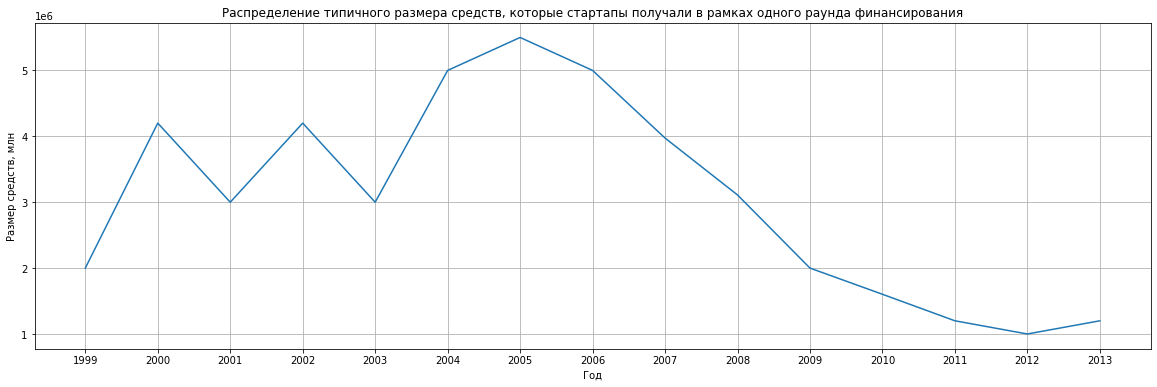

In [12]:
# Для визуализации типичного размера средства будем использовать линейный график:
filtered_by_year.plot(kind = 'line', 
                      x = 'Год', 
                      y = 'Типичный размер средств', 
                      title = 'Распределение типичного размера средств, которые стартапы получали в рамках одного раунда финансирования',
                      xlabel = 'Год', 
                      ylabel = 'Размер средств, млн',
                      legend = False,
                      figsize=(20, 6))
plt.xticks(range(1999, 2014)) #отобразим каждый год на оси ОХ
plt.grid()
plt.show()

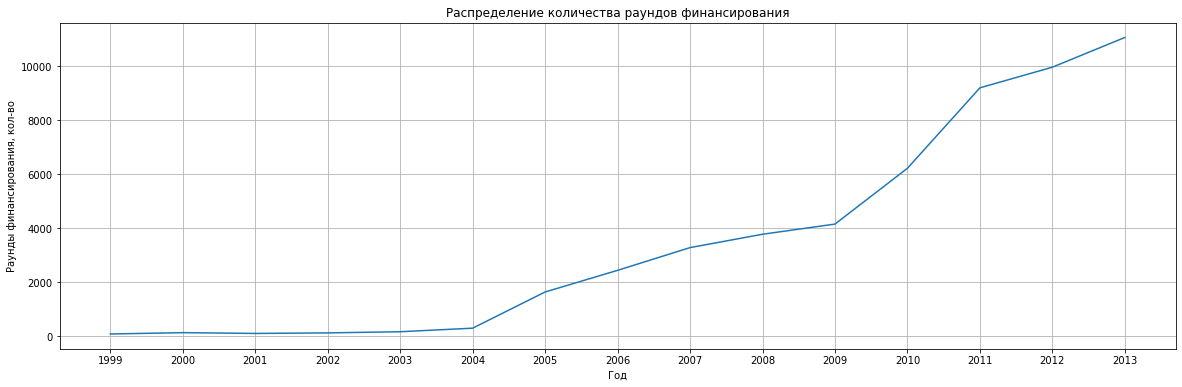

In [13]:
# Для визуализации количества раундов финансирования будем использовать линейный график:
filtered_by_year.plot(kind = 'line', 
                      x = 'Год', 
                      y = 'Количество раундов', 
                      title = 'Распределение количества раундов финансирования',
                      xlabel = 'Год', 
                      ylabel = 'Раунды финансирования, кол-во',
                      legend = False,
                      figsize=(20, 6))
plt.xticks(range(1999, 2014)) #отобразим каждый год на оси ОХ
plt.grid()
plt.show()

Анализ данных показывает, что максимальный типичный размер средств в рамках одного раунда финансирования был достигнут в 2005 году и составил 5 500 000. Что касается тенденций 2013 года, то наблюдался противоречивый тренд: при рекордном количестве раундов финансирования (11 072) типичный размер инвестиций в один раунд значительно сократился до 1 200 000, что демонстрирует обратную зависимость между доступностью финансирования и размером отдельных инвестиционных траншей в этот период.


### 2.2. Люди и их образование


In [14]:
# Начнем анализ полноты сведений о сотрудниках с объединения датасетов people.csv и education.csv по столбцам
# person_id(идентификатор работника) таблицы education и id(идентификатор сотрудника) таблицы people
people_education_df = people_df.merge(education_df, left_on='id', right_on='person_id', suffixes=('_people', '_education'), how='outer')

display(people_education_df.info(), people_education_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268248 entries, 0 to 268247
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  float64       
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109610 non-null  float64       
 6   person_id         109610 non-null  float64       
 7   institution       109555 non-null  object        
 8   graduated_at      58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 20.5+ MB


None

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at
0,10.0,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT
1,100.0,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000.0,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000.0,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000.0,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


Присоеденим к объедененному датасету таблицу degrees. Переименуем и удалим дублированные столбцы.

In [15]:
people_education_degrees_df = people_education_df.merge(degrees_df, left_on='person_id', right_on='object_id', how='outer')

people_education_degrees_df.rename(columns={'id' : 'id_degree'})

people_education_degrees_df.drop(columns=['id_education','person_id','object_id'])

display(people_education_degrees_df.info(), people_education_degrees_df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371810 entries, 0 to 371809
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         370836 non-null  float64       
 1   first_name        370831 non-null  object        
 2   last_name         370835 non-null  object        
 3   company_id        70869 non-null   float64       
 4   network_username  81529 non-null   object        
 5   id_education      213172 non-null  float64       
 6   person_id         213172 non-null  float64       
 7   institution       213082 non-null  object        
 8   graduated_at      114615 non-null  datetime64[ns]
 9   id                213172 non-null  float64       
 10  object_id         213172 non-null  float32       
 11  degree_type       191610 non-null  object        
 12  subject           157183 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(5), object(6)
mem

None

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at,id,object_id,degree_type,subject
0,10.0,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science
1,100.0,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000.0,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000.0,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000.0,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


По аналогии с **Шагом 1** проверим общий датасет на полные дубликаты и при наличии удалим их:

In [16]:
dups = people_education_degrees_df.duplicated(subset=['id_people', 'first_name', 'last_name', 'company_id', 
                                                      'network_username']).sum()

print(f'Найдено дубликатов: {dups}')

Найдено дубликатов: 145100


In [17]:
people_education_degrees_df_wo_dups = people_education_degrees_df.copy() #добавил .copy()
people_education_degrees_df_wo_dups = people_education_degrees_df_wo_dups.drop_duplicates(subset=['id_people', 'first_name', 'last_name', 'company_id', 
                                                      'network_username'])

display(people_education_degrees_df_wo_dups.info(), people_education_degrees_df_wo_dups.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226710 entries, 0 to 370836
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         226709 non-null  float64       
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_education      68072 non-null   float64       
 6   person_id         68072 non-null   float64       
 7   institution       68032 non-null   object        
 8   graduated_at      36388 non-null   datetime64[ns]
 9   id                68072 non-null   float64       
 10  object_id         68072 non-null   float32       
 11  degree_type       61402 non-null   object        
 12  subject           50809 non-null   object        
dtypes: datetime64[ns](1), float32(1), float64(5), object(6)
mem

None

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at,id,object_id,degree_type,subject
0,10.0,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science
1,100.0,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,1000.0,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,10000.0,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,100000.0,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


Далее для анализа создадим столбец-индикатор `educated_true` со значением **1**, если есть дата окончания обучения, либо если есть информация о типе образования, и **0** если наоборот.

In [18]:
people_education_degrees_df_wo_dups['educated_true'] = 0 # Создаем сам столбец-индикатор и по-умолчанию делаем значение 0
people_education_degrees_df_wo_dups.loc[people_education_degrees_df_wo_dups['graduated_at'].notna() | 
                                        people_education_degrees_df_wo_dups['degree_type'].notna(), 'educated_true'] = 1

display(people_education_degrees_df_wo_dups.info(),people_education_degrees_df_wo_dups.head(-5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226710 entries, 0 to 370836
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         226709 non-null  float64       
 1   first_name        226704 non-null  object        
 2   last_name         226708 non-null  object        
 3   company_id        34615 non-null   float64       
 4   network_username  38867 non-null   object        
 5   id_education      68072 non-null   float64       
 6   person_id         68072 non-null   float64       
 7   institution       68032 non-null   object        
 8   graduated_at      36388 non-null   datetime64[ns]
 9   id                68072 non-null   float64       
 10  object_id         68072 non-null   float32       
 11  degree_type       61402 non-null   object        
 12  subject           50809 non-null   object        
 13  educated_true     226710 non-null  int64         
dtypes: d

None

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,institution,graduated_at,id,object_id,degree_type,subject,educated_true
0,10.0,Mark,Zuckerberg,5.0,NaN,2415.0,10.0,Harvard University,NaT,2415.0,10.0,NaN,Computer Science,0
1,100.0,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
2,1000.0,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
3,10000.0,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
4,100000.0,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370813,99979.0,Stephen,Ufford,NaN,NaN,65955.0,99979.0,Hard Knocks,NaT,65955.0,99979.0,PhD,"Building Startups on a Budget, Tech",1
370814,9998.0,Eric,Jensen,1607.0,ej,41088.0,9998.0,Illinois Institute of Technology,2006-01-01,41088.0,9998.0,PhD,Computer Science,1
370815,99983.0,Scott,Mustard,NaN,ScottMustard,14429.0,99983.0,Harvard Business School,NaT,14429.0,99983.0,NaN,NaN,0
370819,99988.0,Imran,Ghory,64683.0,imranghory,14431.0,99988.0,Bristol University,2004-01-01,14431.0,99988.0,BS,Maths and Computer Science,1


Проведем группировку датасета по компаниям и сделаем рассчет количества всего штата компании и количества сотрудников с образованием для каждой компании.

In [19]:
people_education_degrees_df_wo_dups_grouped = people_education_degrees_df_wo_dups.groupby('company_id')['educated_true'].agg(['count', 'sum']).sort_values(by=['count','sum'], ascending=False)

display(people_education_degrees_df_wo_dups_grouped)

,count,sum
company_id,,
59.0,244,163
29.0,150,107
1242.0,138,98
231067.0,72,51
499.0,63,41
...,...,...
285278.0,1,0
285380.0,1,0
285398.0,1,0


**Стандартная бизнес-классификация компаний по численности персонала**

Категории:
- Микропредприятия (1-10 сотрудников
- Малые предприятия (11-50 сотрудников)
- Средние предприятия (51-250 сотрудников
- Крупные предприятия (251-1000 сотрудников)
- Крупнейшие предприятия (1000+ сотрудников)

Данная классификация является международным стандартом для анализа бизнеса. Она разделяет компании по количеству сотрудников на пять основных категорий, где микропредприятия представляют наименьшие формы бизнеса, а крупнейшие - корпорации с максимальным штатом. Малые и средние предприятия (МСП) часто рассматриваются как единая категория, составляющая основу экономики.

In [20]:
def categorize_company_size_standard(employee_count):
    if pd.isna(employee_count):
        return 'unknown'
    elif employee_count <= 10:
        return 'micro (1-10)'
    elif employee_count <= 50:
        return 'small (11-50)'
    elif employee_count <= 250:
        return 'medium (51-250)'
    elif employee_count <= 1000:
        return 'large (251-1000)'
    else:
        return 'enterprise (1000+)'

people_education_degrees_df_wo_dups_grouped['company_size'] = people_education_degrees_df_wo_dups_grouped['count'].apply(categorize_company_size_standard)

display(people_education_degrees_df_wo_dups_grouped)

,count,sum,company_size
company_id,,,
59.0,244,163,medium (51-250)
29.0,150,107,medium (51-250)
1242.0,138,98,medium (51-250)
231067.0,72,51,medium (51-250)
499.0,63,41,medium (51-250)
...,...,...,...
285278.0,1,0,micro (1-10)
285380.0,1,0,micro (1-10)
285398.0,1,0,micro (1-10)


Для простоты анализа составим сводную таблицу отражающую тип предприятия, количество сотрудников с образованием, весь штат компании и отношения работников с образованием к общему числу сотрудников(в процентах).

In [21]:
pivot_company = people_education_degrees_df_wo_dups_grouped.pivot_table(values=['count', 'sum'],
                                                                        index='company_size',
                                                                        aggfunc='sum', 
                                                                        fill_value=0
)

pivot_company['relative_value'] = pivot_company['sum'] / pivot_company['count'] * 100

pivot_company = pivot_company.sort_values(by='relative_value', ascending=False)

display(pivot_company)

,count,sum,relative_value
company_size,,,
medium (51-250),891,600,67.340067
small (11-50),1777,989,55.655599
micro (1-10),31947,16015,50.129903


Анализ полноты информации об образовании сотрудников показал крайне низкий уровень заполненности данных. После объединения таблиц people.csv и education.csv и последующего присоединения degrees.csv было выявлено, что только около 30% сотрудников имеют какую-либо информацию об образовании. При разделении компаний на стандартные категории по численности персонала обнаружилась четкая зависимость: в средних предприятиях (51-250 сотрудников) доля сотрудников с информацией об образовании составляет 67,3%, в малых предприятиях (11-50 сотрудников) - 55,7%, а в микропредприятиях (1-10 сотрудников) - лишь 50,1%. Это свидетельствует о том, что крупные компании склонны вести более организованный учет данных о сотрудниках.

Что касается возможности присоединения таблицы degrees.csv, анализ показал, что это выполнимо через столбец object_id, однако ценность такого объединения ограничена. Несмотря на техническую возможность соединения таблиц через преобразованный столбец object_id (после удаления префикса "p:"), практическая польза от этого невелика из-за высокого уровня пропусков в данных об образовании. Таким образом, добавление degrees.csv не значительно улучшает полноту данных, а лишь немного дополняет имеющуюся информацию.

### 2.3. Объединять или не объединять — вот в чём вопрос



In [22]:
# Выполним поставленную задачу, используя множества:

# Создадим 2 множества, очистив таблицы company_and_rounds_df и people_df от Nan значений(пропусков) в поле 'network_username'
company_and_rounds_network_usernames = set(company_and_rounds_df['network_username'].dropna())
people_network_usernames = set(people_df['network_username'].dropna())

# Найдем пересечения во множествах используя логическое умножение (&, Конъюнкицю):
merged_user_names = company_and_rounds_network_usernames & people_network_usernames

# Проанализируем полученные данные:
print(f'Количество значений во множестве company_and_rounds_network_usernames: {len(company_and_rounds_network_usernames)}')
print(f'Количество значений во множестве people_network_usernames: {len(people_network_usernames)}')
print(f'Количество пересечений двух множеств: {len(merged_user_names)}')
print(f'Относительная величина пересекающихся значений от company_and_rounds_network_usernames, %: {round((len(merged_user_names)/len(company_and_rounds_network_usernames)) * 100, 2)}')
print(f'Относительная величина пересекающихся значений от people_network_usernames, %: {round((len(merged_user_names)/len(people_network_usernames)) * 100, 2)}')

Количество значений во множестве company_and_rounds_network_usernames: 79571
Количество значений во множестве people_network_usernames: 38421
Количество пересечений двух множеств: 2199
Относительная величина пересекающихся значений от company_and_rounds_network_usernames, %: 2.76
Относительная величина пересекающихся значений от people_network_usernames, %: 5.72


Анализ возможности использования столбца `network_username` для объединения данных показывает, что этот атрибут не подходит для надежного соединения таблиц, поскольку наблюдается крайне низкий уровень соответствия значений: из 79 571 уникального имени в датасете компаний и 38 421 в датасете людей только 2 199 значений совпадают, что составляет лишь 2,76% от общего числа записей в `company_and_rounds_df` и 5,72% в `people_df`. Такой незначительный процент пересечений указывает на то, что столбец `network_username` не является универсальным идентификатором и его использование для объединения приведет к потере подавляющего большинства данных, делая результирующую выборку нерепрезентативной.


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

По столбцам датасета `company_and_rounds_df` можно предположить, что он состоит из двух логически связанных таблиц.

Попробуем разделить его на 2 разные подтаблицы:
1. `company_df`. В данной таблице будет храниться информация о компаниях
2. `rounds_df`. В данной таблице будет храниться информация о раундах

По аналогии с **Шагом 1** проведем обработку данных и проверим их на наличие полных дубликатов:

In [23]:
# Создадим подтаблицу company_df:
company_df = company_and_rounds_df[[
    'company_id',
    'name',
    'category_code',
    'status',
    'founded_at',
    'closed_at',
    'domain',
    'network_username',
    'country_code',
    'investment_rounds',
    'funding_rounds',
    'funding_total',
    'milestones'   
]]

# Выведем процентное выражение полных дубликатов в подтаблице company_df:
display(company_df.duplicated().sum() / len(company_df) * 100)

9.744046580399864

В таблице `company_df` нашлось 9.74% дубликатов. Удалим им:

In [24]:
company_df = company_df.drop_duplicates(subset=['company_id'])

company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  Int64         
 10  funding_rounds     196553 non-null  Int64         
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float64(1), 

In [25]:
# Создадим подтаблицу rounds_df:
rounds_df = company_and_rounds_df[[
    'funding_round_id',
    'funding_company_id',
    'funded_at',
    'funding_round_type',
    'raised_amount',
    'pre_money_valuation',
    'participants',
    'is_first_round',
    'is_last_round'
]]

# По аналогии с таблицей company_df очистим полные дубликаты:
rounds_df = rounds_df.drop_duplicates(subset=['funding_company_id'])

rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31940 entries, 0 to 217773
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     31939 non-null  Int64         
 1   funding_company_id   31939 non-null  Int64         
 2   funded_at            31714 non-null  datetime64[ns]
 3   funding_round_type   31939 non-null  object        
 4   raised_amount        31939 non-null  float64       
 5   pre_money_valuation  31939 non-null  float64       
 6   participants         31939 non-null  Int64         
 7   is_first_round       31939 non-null  Int64         
 8   is_last_round        31939 non-null  Int64         
dtypes: Int64(5), datetime64[ns](1), float64(2), object(1)
memory usage: 2.6+ MB


---
#### Промежуточный вывод

Разделили таблицу `company_and_rounds_df` на 2 подтаблицы `company_df` и `rounds_df`. Очистили полные дубликаты. Подготовили данные для последующего анализа.


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных



In [26]:
company_df_upd = company_df[(company_df['funding_rounds'] > 0) | (company_df['investment_rounds'] > 0) |
                            (company_df['status'] == 'acquired')]

display(company_df_upd.info(), company_df_upd.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  Int64         
dtypes: Int64(4), datetime64[ns](2), float64(1), object(6)
memory

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4
15,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000.0,3
20,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.0,4


После фильтрации таблицы `company_df` получили результирующую таблицу с 40747 строками и 13 столбцами (что соответствует описанию в условии: ` "В результирующей таблице должно получиться порядка 40 тысяч компаний" `)


### 3.2. Анализ выбросов



Для начала посмотрим краткие данные о датасете с помощью метода .describe(), построим гистограмму распределения и диаграмму размаха (сначала с выбросами, потом без). На основе результатов всех этих действий проведем сам анализ.

In [27]:
company_df_upd['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

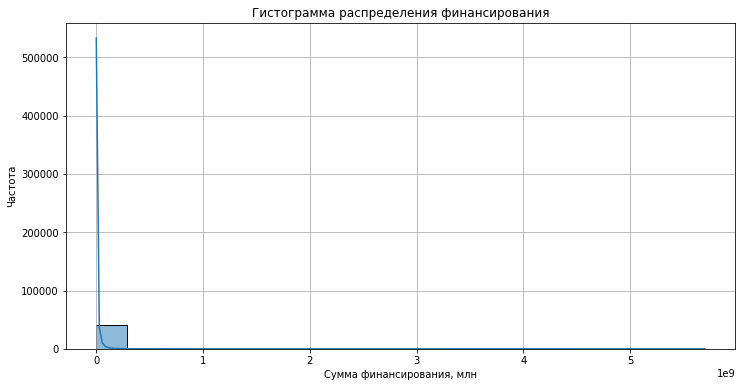

In [28]:
plt.figure(figsize = (12, 6))
sns.histplot(data = company_df_upd,
             x = 'funding_total',
             bins = 20, 
             kde = True) # Добавим оценку плотности ядра

plt.title('Гистограмма распределения финансирования')
plt.xlabel('Сумма финансирования, млн')
plt.ylabel('Частота')
plt.grid()
plt.show()

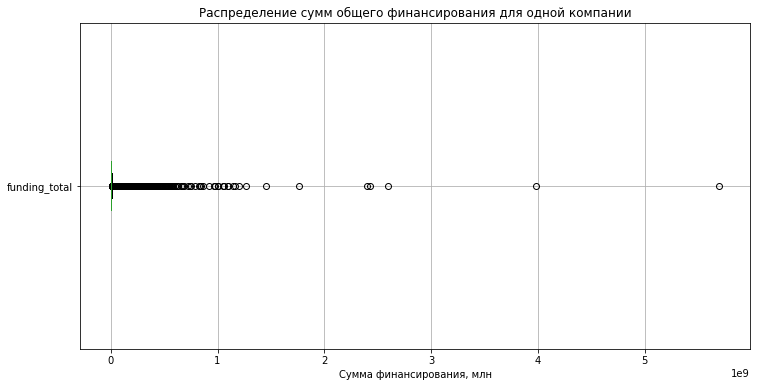

In [29]:
plt.figure(figsize = (12, 6))

company_df_upd.boxplot(column = 'funding_total', 
                       vert = False)

plt.title('Распределение сумм общего финансирования для одной компании')
plt.xlabel('Сумма финансирования, млн')
plt.show()

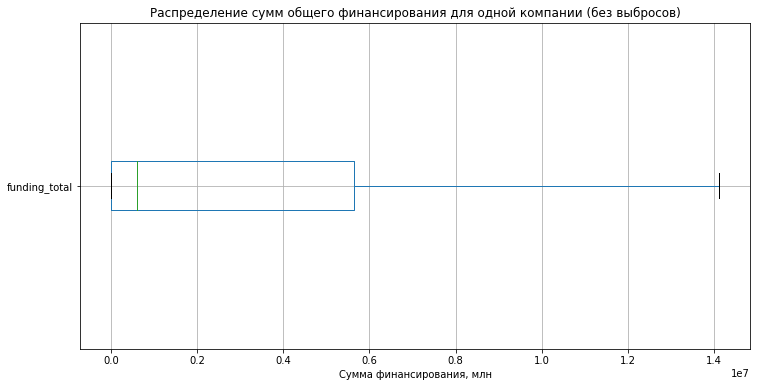

In [30]:
plt.figure(figsize = (12, 6))

company_df_upd.boxplot(column = 'funding_total', 
                       vert = False, 
                       showfliers = False)

plt.title('Распределение сумм общего финансирования для одной компании (без выбросов)')
plt.xlabel('Сумма финансирования, млн')
plt.show()

Визуализации показали очень сильную правостороннюю асимметрию. Стандартные описательные статистики показывают, что среднее значение (10,1 млн) значительно превышает медиану (600 тысяч), что указывает на наличие экстремальных выбросов в данных - в то время как половина компаний получила менее 600 тысяч, максимальное значение достигает 5,7 миллиардов. Типичным (репрезентативным) размером финансирования следует считать медианное значение и межквартильный размах (от 0 до 5,65 млн), в то время как значения выше 75-го процентиля можно считать выбивающимися из общего ряда из-за сильного влияния единичных крупных инвестиционных раундов.


### 3.3. Куплены забесплатно?



Присоединим к датасету `company_df_upd` столбцы `acquired_company_id`, `price_amount` и `term_code` из таблицы `acquisition`. После этого отфильтруем данные по заданным параметрам и проверим распределения по категориям, стране и вариантам покупки.

In [33]:
company_df_upd_added = pd.merge(company_df_upd, 
                                acquisition_df[['acquired_company_id', 'price_amount','term_code']], 
                                left_on = 'company_id',
                                right_on = 'acquired_company_id', 
                                how = 'left'
                               )

display(company_df_upd_added.info(), company_df_upd_added.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           40890 non-null  Int64         
 1   name                 40890 non-null  object        
 2   category_code        35436 non-null  object        
 3   status               40890 non-null  object        
 4   founded_at           27911 non-null  datetime64[ns]
 5   closed_at            2128 non-null   datetime64[ns]
 6   domain               35883 non-null  object        
 7   network_username     20938 non-null  object        
 8   country_code         34858 non-null  object        
 9   investment_rounds    40890 non-null  Int64         
 10  funding_rounds       40890 non-null  Int64         
 11  funding_total        40890 non-null  float64       
 12  milestones           40890 non-null  Int64         
 13  acquired_company_id  9390 non-n

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquired_company_id,price_amount,term_code
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000.0,5,NaN,NaN,NaN
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0.0,0,10.0,20000000.0,NaN
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0.0,4,100.0,0.0,cash
3,1001,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,5000000.0,3,1001.0,47500000.0,cash_and_stock
4,10014,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0.0,4,10014.0,0.0,NaN


Теперь приступим к фильтрации:

In [39]:
company_df_upd_added_filtered = company_df_upd_added[
    (company_df_upd_added['status'] == 'acquired') &
    (company_df_upd_added['funding_total'] > 0) & 
    ((company_df_upd_added['price_amount'] == 0) | (company_df_upd_added['price_amount'] == 1))
]

display(company_df_upd_added_filtered.info(), company_df_upd_added_filtered.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 25 to 40872
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           1618 non-null   Int64         
 1   name                 1618 non-null   object        
 2   category_code        1553 non-null   object        
 3   status               1618 non-null   object        
 4   founded_at           1285 non-null   datetime64[ns]
 5   closed_at            13 non-null     datetime64[ns]
 6   domain               1546 non-null   object        
 7   network_username     812 non-null    object        
 8   country_code         1536 non-null   object        
 9   investment_rounds    1618 non-null   Int64         
 10  funding_rounds       1618 non-null   Int64         
 11  funding_total        1618 non-null   float64       
 12  milestones           1618 non-null   Int64         
 13  acquired_company_id  1618 non-n

None

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,acquired_company_id,price_amount,term_code
25,10054,Jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,USA,0,7,121500000.0,3,10054.0,0.0,cash_and_stock
63,101312,SideTour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,USA,0,3,4000000.0,2,101312.0,0.0,NaN
66,101340,ChoicePass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,USA,0,1,250000.0,1,101340.0,0.0,NaN
67,10137,Producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,USA,0,3,1310000.0,2,10137.0,0.0,cash_and_stock
68,10139,TradeCard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,USA,0,2,44925000.0,1,10139.0,0.0,NaN


In [41]:
print("Распределение по категориям компаний (абсолютные значения):")
display(company_df_upd_added_filtered['category_code'].value_counts())

print("Распределение по категориям компаний (относительные значения):")
display(company_df_upd_added_filtered['category_code'].value_counts(normalize = True))

Распределение по категориям компаний (абсолютные значения):


software            362
web                 216
enterprise          131
mobile              118
advertising          77
games_video          76
biotech              69
ecommerce            61
network_hosting      56
semiconductor        43
cleantech            40
hardware             36
analytics            32
security             30
public_relations     26
other                20
search               18
social               17
messaging            16
travel               16
health               13
medical              11
education            10
consulting           10
news                  9
music                 8
finance               7
fashion               5
photo_video           3
manufacturing         3
design                3
hospitality           3
automotive            2
transportation        2
legal                 2
sports                2
Name: category_code, dtype: int64

Распределение по категориям компаний (относительные значения):


software            0.233097
web                 0.139086
enterprise          0.084353
mobile              0.075982
advertising         0.049581
games_video         0.048938
biotech             0.044430
ecommerce           0.039279
network_hosting     0.036059
semiconductor       0.027688
cleantech           0.025757
hardware            0.023181
analytics           0.020605
security            0.019317
public_relations    0.016742
other               0.012878
search              0.011590
social              0.010947
messaging           0.010303
travel              0.010303
health              0.008371
medical             0.007083
education           0.006439
consulting          0.006439
news                0.005795
music               0.005151
finance             0.004507
fashion             0.003220
photo_video         0.001932
manufacturing       0.001932
design              0.001932
hospitality         0.001932
automotive          0.001288
transportation      0.001288
legal         

In [42]:
print("Распределение по странам (абсолютные значения):")
display(company_df_upd_added_filtered['country_code'].value_counts())

print("Распределение по странам (относительные значения):")
display(company_df_upd_added_filtered['country_code'].value_counts(normalize = True))

Распределение по странам (абсолютные значения):


USA    1236
GBR      64
CAN      46
DEU      31
ISR      27
FRA      24
IRL      11
DNK       9
SWE       8
IND       7
ESP       7
CHE       6
ITA       6
FIN       6
NLD       5
JPN       5
CHN       4
NOR       4
BEL       4
ARG       4
AUT       3
SGP       3
BGR       2
AUS       2
RUS       1
THA       1
KOR       1
UMI       1
POL       1
CZE       1
TUR       1
BRA       1
HKG       1
HUN       1
CHL       1
URY       1
Name: country_code, dtype: int64

Распределение по странам (относительные значения):


USA    0.804688
GBR    0.041667
CAN    0.029948
DEU    0.020182
ISR    0.017578
FRA    0.015625
IRL    0.007161
DNK    0.005859
SWE    0.005208
IND    0.004557
ESP    0.004557
CHE    0.003906
ITA    0.003906
FIN    0.003906
NLD    0.003255
JPN    0.003255
CHN    0.002604
NOR    0.002604
BEL    0.002604
ARG    0.002604
AUT    0.001953
SGP    0.001953
BGR    0.001302
AUS    0.001302
RUS    0.000651
THA    0.000651
KOR    0.000651
UMI    0.000651
POL    0.000651
CZE    0.000651
TUR    0.000651
BRA    0.000651
HKG    0.000651
HUN    0.000651
CHL    0.000651
URY    0.000651
Name: country_code, dtype: float64

In [43]:
print("Распределение по способу покупки (абсолютные значения):")
display(company_df_upd_added_filtered['term_code'].value_counts())

print("Распределение по способу покупки (относительные значения):")
display(company_df_upd_added_filtered['term_code'].value_counts(normalize = True))

Распределение по способу покупки (абсолютные значения):


cash              68
cash_and_stock    35
stock             18
Name: term_code, dtype: int64

Распределение по способу покупки (относительные значения):


cash              0.561983
cash_and_stock    0.289256
stock             0.148760
Name: term_code, dtype: float64

Сгруппируем получившиеся данные:

In [44]:
company_df_upd_added_filtered.groupby('price_amount').agg({'company_id' : 'count', 'funding_total' : 'median'})

,company_id,funding_total
price_amount,,
0.0,1618,6000000.0


Анализ компаний, проданных за символическую цену (0 или 1) при наличии ненулевого финансирования, выявил значительную выборку из 1618 кейсов. Наиболее представленными оказались компании из сектора software (23,3%), web (13,9%) и enterprise (8,4%), что свидетельствует о концентрации подобных сделок в технологическом секторе. Географически доминируют США (80,5%), что коррелирует с общей активностью венчурного рынка.

Примечательно, что медианный объем привлеченного финансирования для таких компаний составил 6 млн долларов, что указывает на существенные инвестиции до момента продажи. Распределение по способам покупки показывает преобладание cash-сделок (56,2%), однако значительная доля комбинированных форм расчетов (cash_and_stock - 28,9%, stock - 14,9%) предполагает, что многие сделки могли быть стратегическими приобретениями с элементами интеграции.

Определим показатели выбросов.Будем использовать квартили для этого:

In [46]:
Q1 = company_df_upd_added_filtered['funding_total'].quantile(0.25) 
Q3 = company_df_upd_added_filtered['funding_total'].quantile(0.75) 

IQR = Q3 - Q1 # Расчет межквартального размаха

lower_bound = max(Q1 - 1.5 * IQR, 0)
upper_bound = Q3 + 1.5 * IQR

outliers = company_df_upd_added_filtered[(company_df_upd_added_filtered['funding_total'] < lower_bound) | 
                                          (company_df_upd_added_filtered['funding_total'] > upper_bound)].count()

lower_percentile = (company_df_upd_added_filtered['funding_total'] <= lower_bound).mean() * 100
upper_percentile = (company_df_upd_added_filtered['funding_total'] <= upper_bound).mean() * 100

print(f"Нижний квартиль: {Q1}.")
print(f"Верхний квартиль: {Q3}.")
print(f"Размах финансирования компаний: {IQR}.") 
print(f"Нижний порог выбросов: {lower_bound}.") 
print(f"Верхний порог выбросов: {upper_bound}.")
print(f'Типичный размер финансирования: от {Q1} до {Q3}')
print(f'Количество выбросов: {len(outliers)}')
print(f"Нижняя граница соответствует {lower_percentile:.2f}% данных.")
print(f"Верхняя граница соответствует {upper_percentile:.2f}% данных.")

Нижний квартиль: 2000000.0.
Верхний квартиль: 15500000.0.
Размах финансирования компаний: 13500000.0.
Нижний порог выбросов: 0.
Верхний порог выбросов: 35750000.0.
Типичный размер финансирования: от 2000000.0 до 15500000.0
Количество выбросов: 16
Нижняя граница соответствует 0.00% данных.
Верхняя граница соответствует 90.91% данных.


Типичный диапазон финансирования составляет от 2 до 15,5 млн (IQR = 13,5 млн), при этом верхняя граница выбросов находится на уровне 35,75 млн, что охватывает 90,91% всех наблюдений.

Примечательно, что было выявлено лишь 16 выбросов, что составляет относительно небольшую долю от общей выборки. Такое распределение может свидетельствовать о том, что большинство компаний, приобретенных за 0-1, привлекали умеренное финансирование (в пределах 2-15 млн), что характерно для стартапов на ранних и средних стадиях развития. Высокая верхняя граница (35,75 млн) при малом количестве выбросов предполагает, что даже существенно профинансированные компании могли быть проданы за символическую цену, возможно, в ситуациях стратегических приобретений, когда технология или команда представляли ценность, несмотря на финансовые трудности или необходимость срочного выхода инвесторов.


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.



Первым шагом проведем очистку датасета, а именно уберем пропуски. Следующим шагом сгруппируем данные и после этого сделаем визуализацию. Последним шагом отсортируем данные для составления топа. Типичной ценой возьмем медиану, а разбросом - среднеквадратичное отклонение.

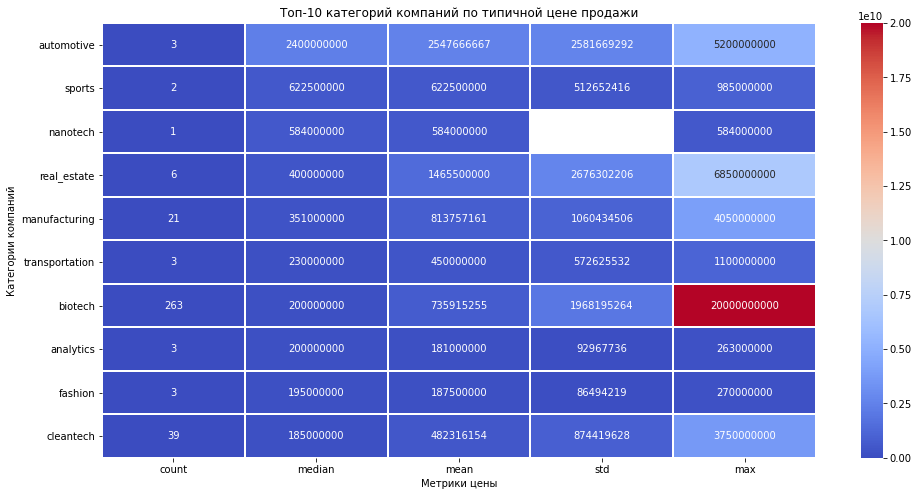

In [53]:
category_of_companies = company_df_upd_added[(company_df_upd_added['category_code'].notna()) & 
                                             (company_df_upd_added['category_code'] != 'other') & 
                                             (company_df_upd_added['price_amount'] > 1)]

# Группируем по категориям и считаем нужные метрики
group_category_of_companies = category_of_companies.groupby('category_code')['price_amount'].agg([
    'count', 
    'median', 
    'mean', 
    'std', 
    'max'
]).round(0)

#состовляем топ 10 с типично высокими ценами
top_10_median = group_category_of_companies.sort_values('median', ascending=False).head(10)

# Создаем тепловую карту для визуализации
plt.figure(figsize=(16, 8))
sns.heatmap(data=top_10_median, # Выбираем только нужные столбцы для визуализации
            annot=True, 
            fmt='.0f',  
            linewidths=1, 
            cmap='coolwarm'
)

plt.title('Топ-10 категорий компаний по типичной цене продажи')
plt.xlabel('Метрики цены')
plt.ylabel('Категории компаний')
plt.show()

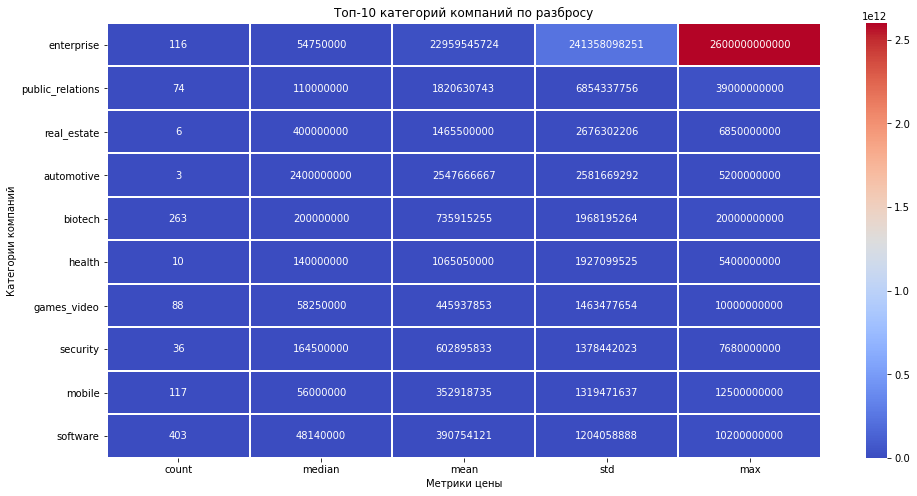

In [54]:
top_10_std = group_category_of_companies.sort_values('std', ascending = False).head(10)

plt.figure(figsize = (16, 8))
sns.heatmap(data = top_10_std,
            annot = True, 
            fmt = '.0f', 
            linewidths = 1, 
            cmap = 'coolwarm'
)

plt.title('Топ-10 категорий компаний по разбросу')
plt.xlabel('Метрики цены')
plt.ylabel('Категории компаний')
plt.show()

Анализ категорий стартапов с высокими ценами покупки и значительным разбросом цен проводился для выявления наиболее привлекательных направлений для инвестиций. Топ-10 категорий был выбран как оптимальное количество, обеспечивающее репрезентативность выборки без избыточной детализации. В качестве основных метрик использовались медиана для оценки типичной цены (как робастный показатель, устойчивый к выбросам) и стандартное отклонение для измерения разброса стоимостных показателей.

Наиболее перспективными для инвесторов являются категории, демонстрирующие одновременно высокую медианную цену и значительный разброс значений (такими категориями являются: `biotech`, `automotive` и `real_estate`). Высокая медиана указывает на общую рыночную оценку перспективности направления, а большой разброс цен свидетельствует о наличии как умеренно успешных компаний, так и потенциальных "единорогов" с многократно превышающей стоимостью. Такое сочетание создает условия для достижения сверхдоходов при грамотном выборе объектов инвестирования.


### 3.5. Сколько раундов продержится стартап перед покупкой



In [31]:
# Для начала анализа "отбросим" стартапы с нулевыми раундами
funding_rounds_analytics = company_df_upd[company_df_upd['funding_rounds'] > 0]

group_by_status = funding_rounds_analytics.groupby('status').agg({'funding_rounds':'mean'}).reset_index()

print(f'Среднее количество раундов для каждой группы стартапов:')
display(group_by_status)

Среднее количество раундов для каждой группы стартапов:


,status,funding_rounds
0,acquired,1.896645
1,closed,1.383437
2,ipo,2.526531
3,operating,1.642359


Построим визуализацию. Будем использовать столбчатую диаграмму.

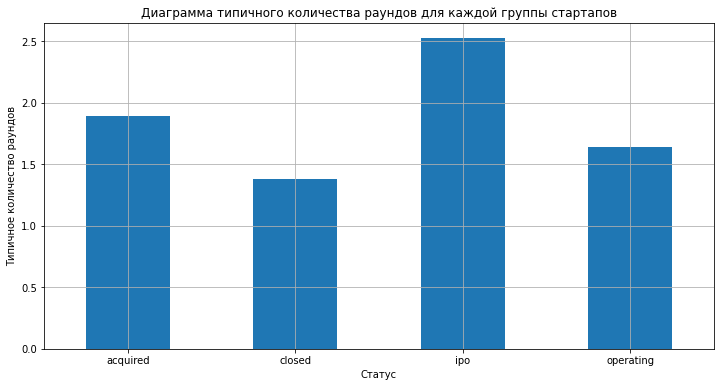

In [32]:
group_by_status.plot(kind='bar',
                    x='status',
                    y='funding_rounds',
                    legend=False,
                    rot=0,
                    figsize=(12,6))

plt.title('Диаграмма типичного количества раундов для каждой группы стартапов')
plt.xlabel('Статус')
plt.ylabel('Типичное количество раундов')
plt.grid()
plt.show()

Компании, достигшие IPO, проходят наибольшее среднее количество раундов (2.53), что свидетельствует о необходимости значительных инвестиций для выхода на биржу; приобретенные стартапы (acquired) показывают средний результат (1.90 раунда), тогда как закрытые компании (closed) и operating-стартапы демонстрируют наименьшие значения (1.38 и 1.64 соответственно), что указывает на возможную корреляцию между объемом привлеченного финансирования и конечным успехом компании.


## Шаг 4. Итоговый вывод и рекомендации



Проект выявил системные проблемы с качеством данных - критически высокий уровень пропусков в ключевых полях (до 80% в информации о сделках и условиях расчетов) существенно ограничивает репрезентативность выборки и требует крайне осторожной интерпретации результатов. Несмотря на это, анализ позволил идентифицировать значимые закономерности: технологический сектор (software, web, enterprise) демонстрирует наибольшую концентрацию сделок, включая символические продажи за 0-1 при наличии существенного финансирования, что может указывать на стратегические приобретения перспективных активов.

Для минимизации рисков и максимизации доходности рекомендуется фокусироваться на категориях с одновременно высокой медианной ценой и значительным разбросом стоимостных показателей (biotech, automotive, real_estate), поскольку такое сочетание свидетельствует о наличии потенциала для сверхдоходов при успешном выборе объектов инвестирования. Анализ раундов финансирования показал четкую корреляцию между объемом привлеченных инвестиций и успехом компании - стартапы, достигшие IPO, проходили в среднем 2.53 раунда против 1.38 у закрывшихся компаний. Географически следует концентрироваться на рынке США (80.5% выявленных сделок), но с учетом отраслевой специфики целевых категорий. Для повышения достоверности будущих анализов необходимо инвестировать в улучшение системы сбора и верификации данных, особенно в части информации об условиях сделок и образовании ключевых сотрудников.